In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from solver import CaptioningSolver
from model import CaptionGenerator
from coco_utils import load_coco_data, decode_captions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
small_data = load_coco_data('small_data.pkl')
word_to_idx = small_data['word_to_idx']

train_image_filename <type 'numpy.ndarray'> (82783,) <U31
idx_to_word <type 'dict'> 1259
train_captions <type 'numpy.ndarray'> (100, 17) int32
train_image_idxs <type 'numpy.ndarray'> (100,) int32
train_features <type 'numpy.ndarray'> (100, 196, 512) float64
word_to_idx <type 'dict'> 1259


In [3]:
model = CaptionGenerator(word_to_idx, batch_size= 10, dim_feature=[196, 512], dim_embed=128,
                                   dim_hidden=128, n_time_step=16, cell_type='rnn', dtype=tf.float32)

In [4]:
solver = CaptioningSolver(model, small_data, n_epochs=100, batch_size=10, update_rule='adam',
                                      learning_rate=0.004, print_every=10, save_every=100,
                                pretrained_model=None, model_path='./model/', test_model='./model/model-200')

In [10]:
#decode_captions(small_data['train_captions'], small_data['idx_to_word'])[10:70]

num epochs: 100
iterations per epoch: 10
data size: 100
batch size: 10

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Initial Train Loss: 839.39087
Generated Caption: pitcher lamps purple purple purple talking surface surface surface surface surface surface surface surface surface surface
Generated Caption: pitcher lamps purple purple talking surface surface surface surface talking surface talking surface surface surface surface
Generated Caption: edge edge edge sail books edge park edge road road road edge park park road
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train Loss at Epoch 10: 190.75075
Generated Caption: a child person and a kitchen person cooking on the kitchen <END>
Generated Caption: a up of a container <UNK> <UNK> <UNK>

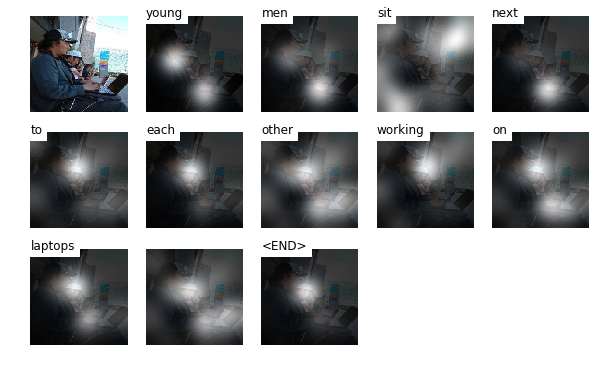

Sampled Caption: a young person and an older person in a kitchen <END>


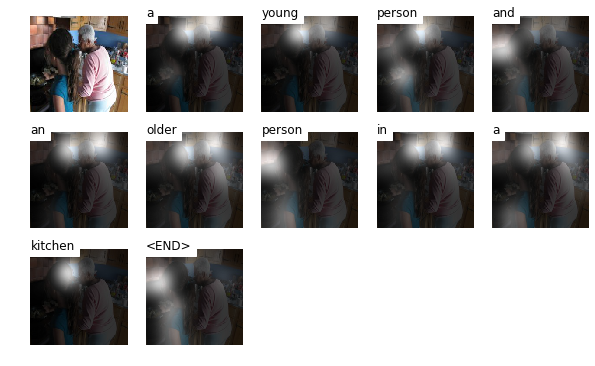

Sampled Caption: dining room table set for a <UNK> meal with flowers <END>


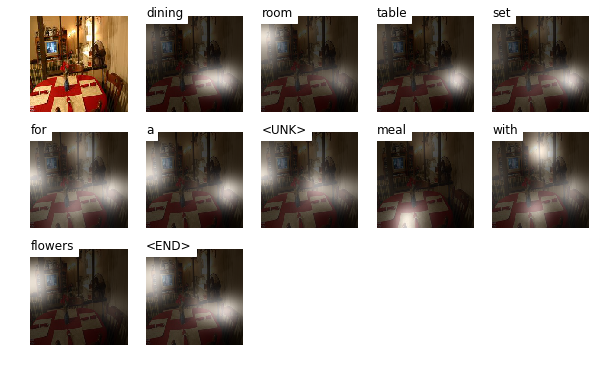

Sampled Caption: dining room table set for a <UNK> meal with flowers <END>


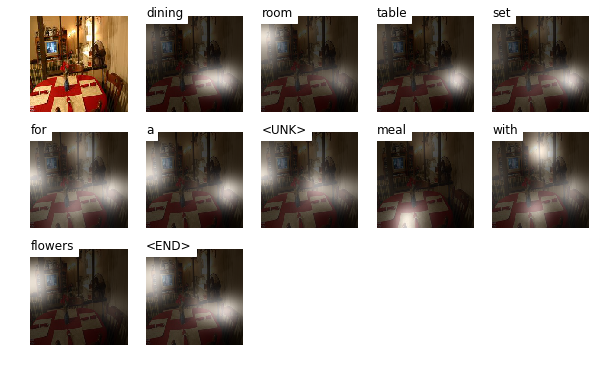

Sampled Caption: a big red telephone <UNK> that a man is standing in <END>


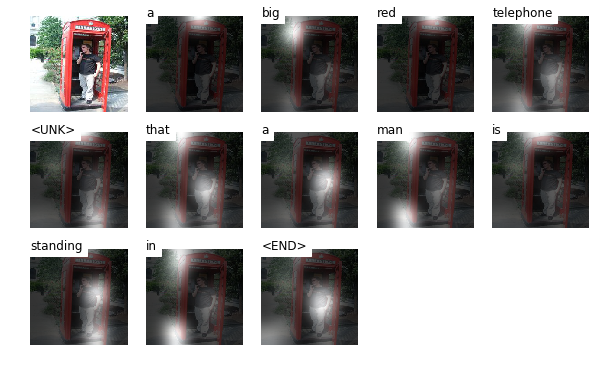

Sampled Caption: a big red telephone <UNK> that a man is standing in <END>


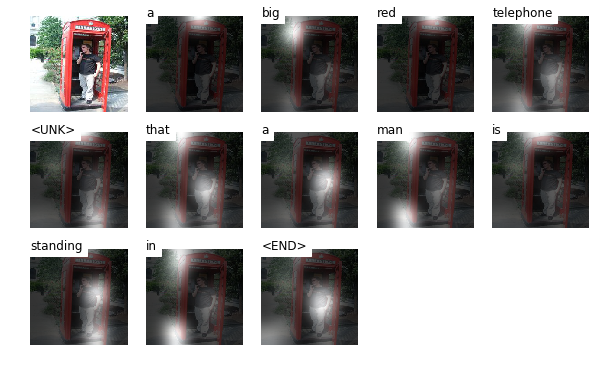

Sampled Caption: a group of men at a table preparing food together <END>


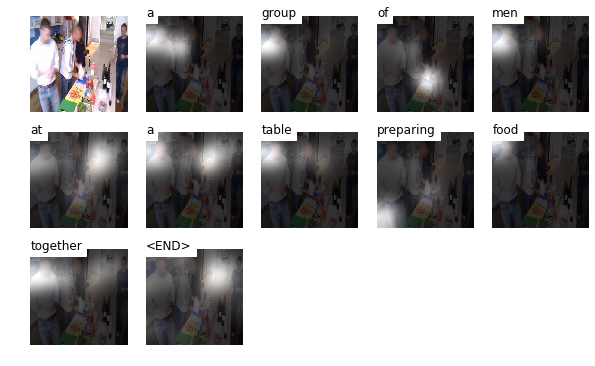

Sampled Caption: a man in glasses walks through an open door  <END>


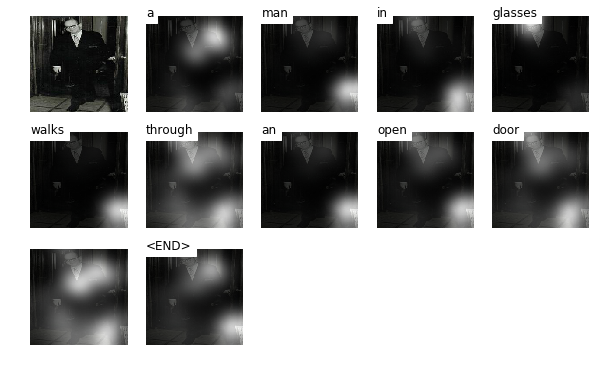

Sampled Caption: a man cutting up <UNK> at an outdoor table  <END>


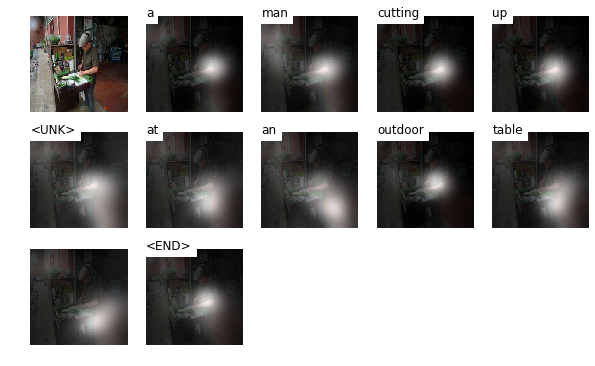

Sampled Caption: a man cutting up <UNK> at an outdoor table  <END>


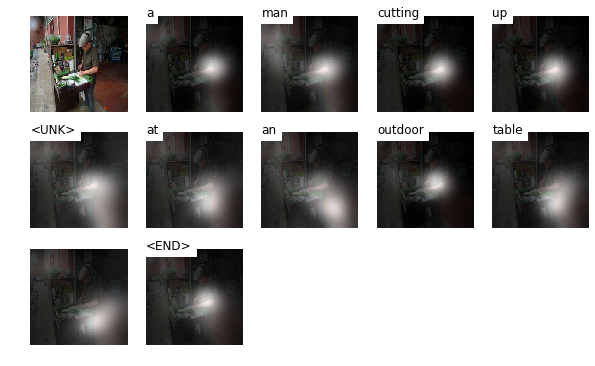

In [6]:
solver.train()

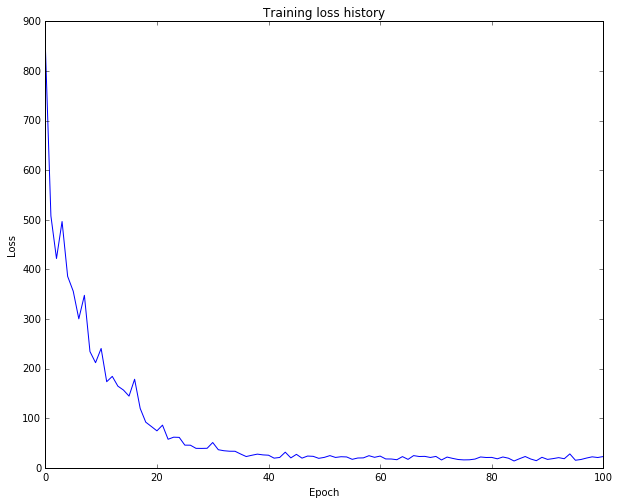

In [17]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()